In [1]:
import screcode
import numpy as np
import scanpy as sc
import sklearn
import pandas as pd
import anndata

import importlib
importlib.reload(screcode)

<module 'screcode' from 'd:\\GitHub\\RECODE\\python\\screcode\\screcode.py'>

In [19]:
data = pd.read_csv("data/downsamppling_exp.txt",delimiter='\t',index_col=0)
meta = pd.read_csv("data/downsamppling_meta.txt",delimiter='\t',index_col=0)

adata = anndata.AnnData(data,obs=meta,dtype=int)
del data,meta
adata.obsm['Raw'] = adata.X
adata.obs

,batch,batch_number,CellType
b1_exprs_293t_ATGTAAACATCAGC,b1_exprs,1,293t
b1_exprs_293t_CTCGAGCTGAGACG,b1_exprs,1,293t
b1_exprs_293t_ACACGATGCTTATC,b1_exprs,1,293t
b1_exprs_293t_TCAAGGTGGACACT,b1_exprs,1,293t
b1_exprs_293t_AAGAAGACCGACAT,b1_exprs,1,293t
...,...,...,...
b3_exprs_mixed_TTGAATGAATTCCT,b3_exprs,3,293t
b3_exprs_mixed_TACTCCCTTCCCGT,b3_exprs,3,293t
b3_exprs_mixed_CAGCCTTGGGTCTA,b3_exprs,3,293t
b3_exprs_mixed_GCACGGTGCGCTAA,b3_exprs,3,jurkat


In [21]:
import importlib

importlib.reload(screcode)
recode = screcode.RECODE(version=1)
adata = recode.fit_transform_integration(adata)

start RECODE for scRNA-seq


In [4]:
target_sum = 1e4
n_PCA = 50
adata = recode.lognormalize(adata,target_sum=target_sum)
adata.obsm['RECODE_log_pca'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.layers['RECODE_log'])

Normalized data are stored in "RECODE_norm" and "RECODE_log"


In [ ]:
adata.uns['size_factor'] = 10**4
n_PCA = 20

adata.obsm['Raw_ss_log'] = np.log2(adata.uns['size_factor']*adata.obsm['Raw'].T/np.sum(adata.obsm['Raw'],axis=1)+1).T
adata.obsm['Raw_ss_log_PCA'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.obsm['Raw_ss_log'])

adata.obsm['RECODE_ss_log'] = np.log2(adata.uns['size_factor']*adata.obsm['RECODE'].T/np.sum(adata.obsm['RECODE'],axis=1)+1).T
adata.obsm['RECODE_ss_log_PCA'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.obsm['RECODE_ss_log'])

In [ ]:
import matplotlib.pyplot as plt

idx_batch = 'batch'
idx_celltype = 'CellType'
fs_title  = 16
fs_label  = 16
fs_legend = 16

plot_color = adata.obs[idx_batch]
plot_color_set = np.unique(plot_color)
plot_data_1 = adata.obsm['Raw_ss_log_PCA']
plot_data_2 = adata.obsm['RECODE_ss_log_PCA']
fig,ax = plt.subplots(2,2,figsize=(15,12),tight_layout=True)
ax_ = ax[0,0]
for b in plot_color_set:
    ax_.scatter(plot_data_1[plot_color==b,0],plot_data_1[plot_color==b,1],label=b)
ax_.set_title('Raw',fontsize=fs_title)
ax_ = ax[0,1]
for b in plot_color_set:
    ax_.scatter(plot_data_2[plot_color==b,0],plot_data_2[plot_color==b,1],label=b)
ax_.set_title('IntegRECODE',fontsize=fs_title)
ax_.legend(bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad=0, fontsize=fs_legend,markerscale=2)
plot_color = adata.obs[idx_celltype]
plot_color_set = np.unique(plot_color)
ax_ = ax[1,0]
for b in plot_color_set:
    ax_.scatter(plot_data_1[plot_color==b,0],plot_data_1[plot_color==b,1],label=b)
ax_ = ax[1,1]
for b in plot_color_set:
    ax_.scatter(plot_data_2[plot_color==b,0],plot_data_2[plot_color==b,1],label=b)
ax_.legend(bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad=0, fontsize=fs_legend,markerscale=2)
fig.text(0.45, -0.01, 'PC1', ha='center',fontsize=fs_label)
fig.text(-0.01, 0.5, 'PC2', va='center', rotation='vertical',fontsize=fs_label)

In [5]:
import scanpy
scanpy.pp.normalize_total(adata, target_sum=target_sum)
scanpy.pp.log1p(adata)
scanpy.pp.pca(adata)

In [9]:
scanpy.external.pp.harmony_integrate(adata,key="batch",verbose=False)

2023-08-07 19:18:51,577 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-07 19:18:52,109 - harmonypy - INFO - sklearn.KMeans initialization complete.


In [7]:
adata

AnnData object with n_obs × n_vars = 1500 × 18279
    obs: 'batch', 'batch_number', 'CellType'
    var: 'noise_variance_RECODE', 'normalized_variance_RECODE', 'significance_RECODE'
    uns: 'log1p', 'pca'
    obsm: 'RECODE_log_pca', 'X_pca', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'RECODE', 'RECODE_norm', 'RECODE_log'

In [13]:
import anndata
adata_ = anndata.AnnData(
            adata.X,
            obs = {"batch":adata.obs["batch"]},
            obsm = {"X":adata.X},
        )
adata_

AnnData object with n_obs × n_vars = 1500 × 18279
    obs: 'batch'
    obsm: 'X'

Text(-0.01, 0.5, 'PC2')

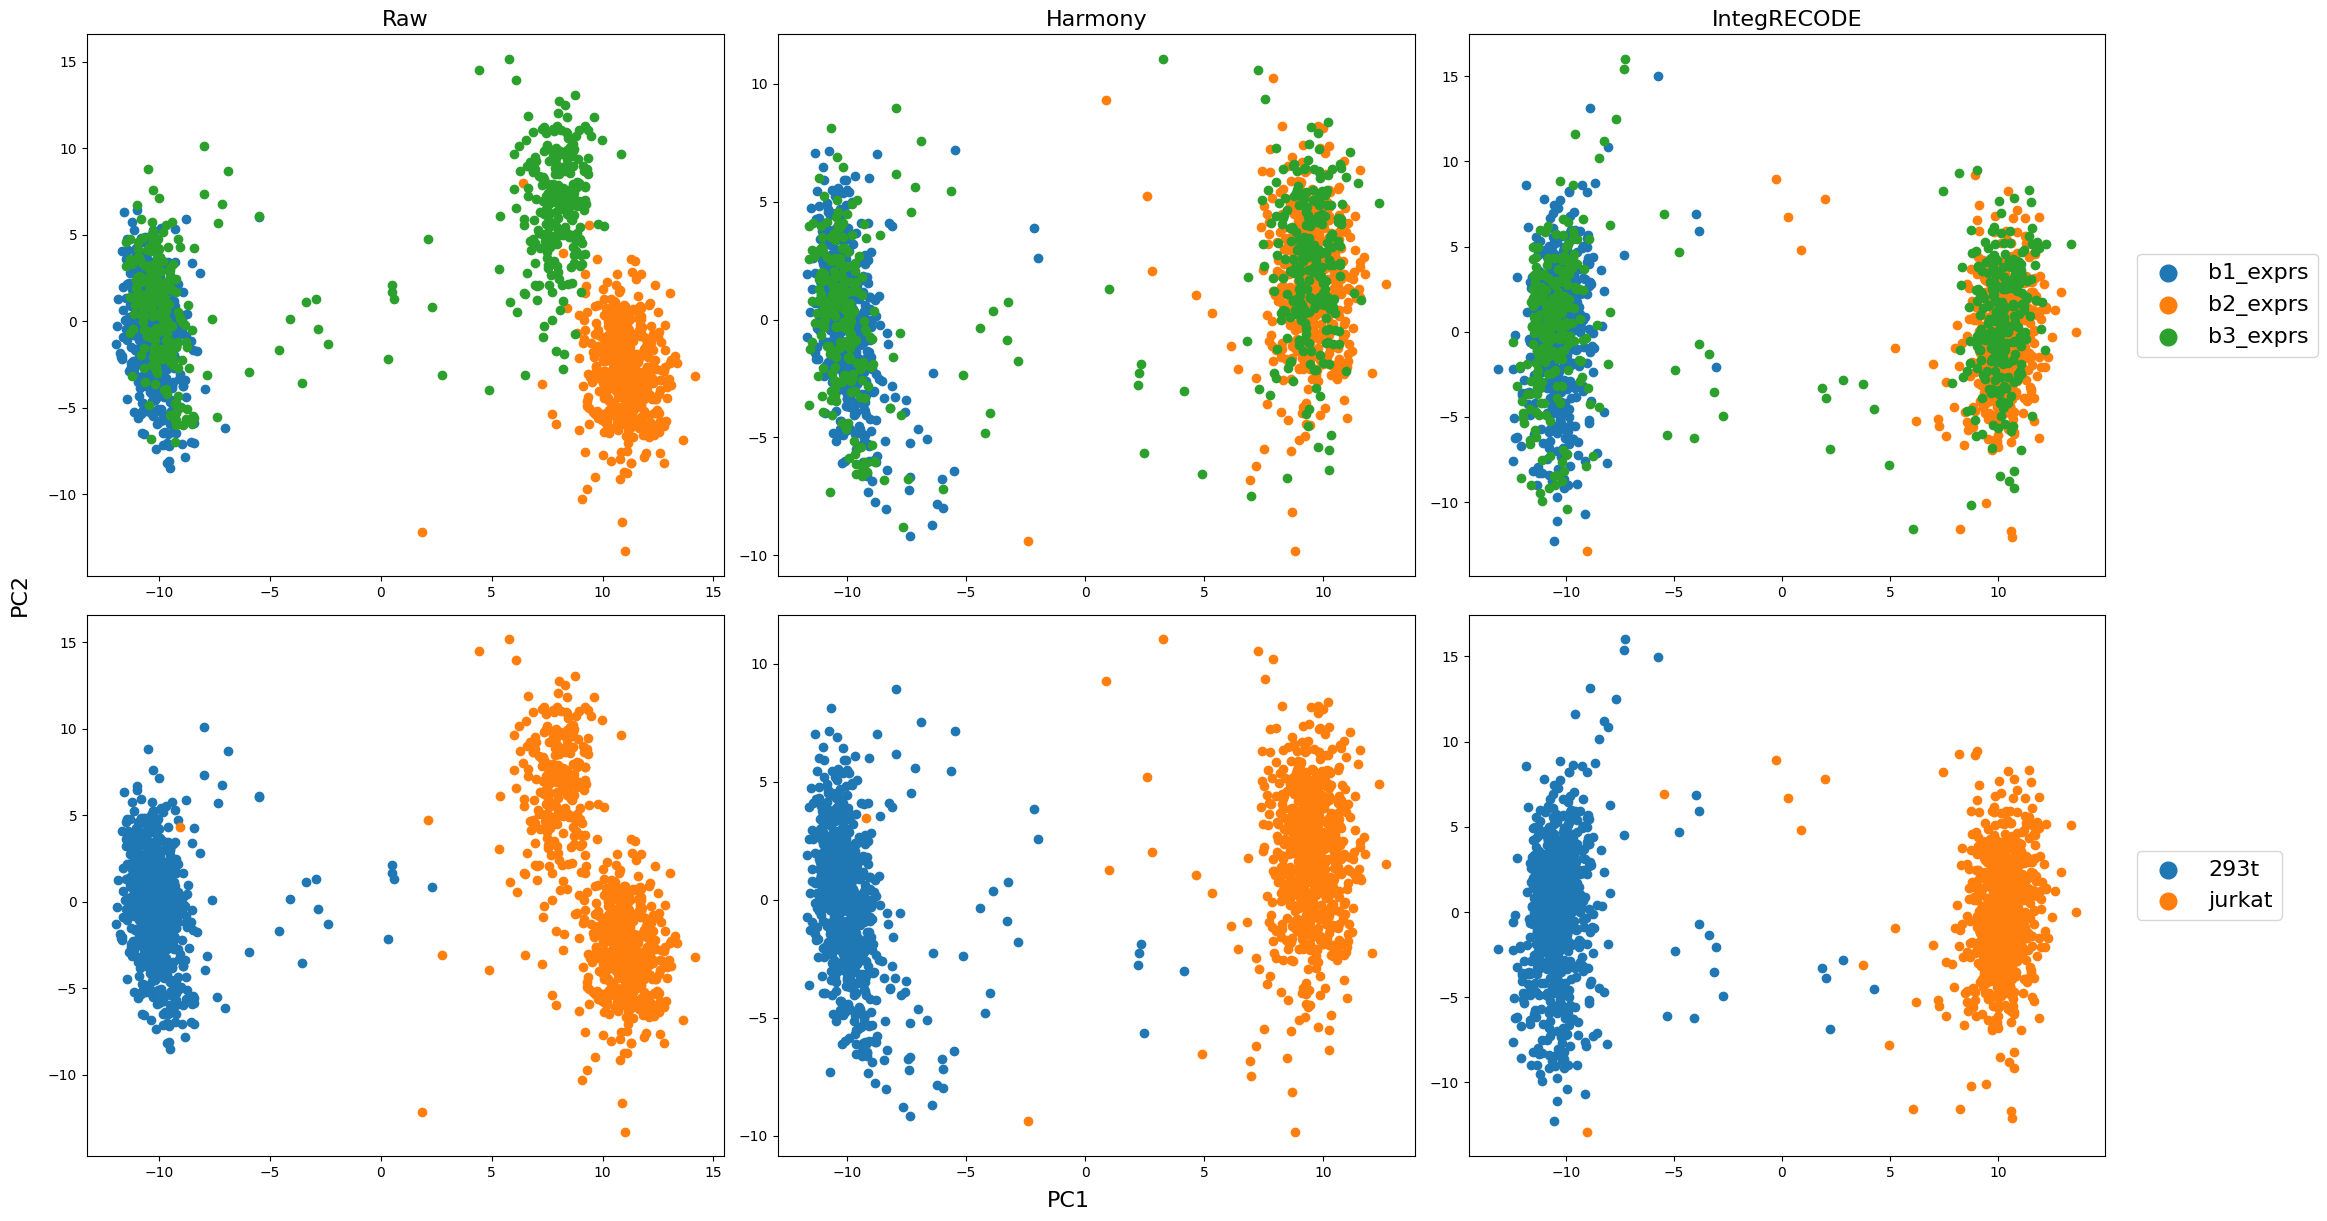

In [8]:
aimport matplotlib.pyplot as plt

idx_batch = 'batch'
idx_celltype = 'CellType'
fs_title  = 16
fs_label  = 16
fs_legend = 16

plot_color = adata.obs[idx_batch]
plot_color_set = np.unique(plot_color)
plot_data_1 = adata.obsm['X_pca']
plot_data_2 = adata.obsm['X_pca_harmony']
plot_data_3 = adata.obsm['RECODE_log_pca']
fig,ax = plt.subplots(2,3,figsize=(23,12),tight_layout=True)
ax_ = ax[0,0]
for b in plot_color_set:
    ax_.scatter(plot_data_1[plot_color==b,0],plot_data_1[plot_color==b,1],label=b)
ax_.set_title('Raw',fontsize=fs_title)
ax_ = ax[0,1]
for b in plot_color_set:
    ax_.scatter(plot_data_2[plot_color==b,0],plot_data_2[plot_color==b,1],label=b)
ax_.set_title('Harmony',fontsize=fs_title)
ax_ = ax[0,2]
for b in plot_color_set:
    ax_.scatter(plot_data_3[plot_color==b,0],plot_data_3[plot_color==b,1],label=b)
ax_.set_title('IntegRECODE',fontsize=fs_title)
ax_.legend(bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad=0, fontsize=fs_legend,markerscale=2)
plot_color = adata.obs[idx_celltype]
plot_color_set = np.unique(plot_color)
ax_ = ax[1,0]
for b in plot_color_set:
    ax_.scatter(plot_data_1[plot_color==b,0],plot_data_1[plot_color==b,1],label=b)
ax_ = ax[1,1]
for b in plot_color_set:
    ax_.scatter(plot_data_2[plot_color==b,0],plot_data_2[plot_color==b,1],label=b)
ax_ = ax[1,2]
for b in plot_color_set:
    ax_.scatter(plot_data_3[plot_color==b,0],plot_data_3[plot_color==b,1],label=b)
ax_.legend(bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad=0, fontsize=fs_legend,markerscale=2)
fig.text(0.45, -0.01, 'PC1', ha='center',fontsize=fs_label)
fig.text(-0.01, 0.5, 'PC2', va='center', rotation='vertical',fontsize=fs_label)

In [ ]:
adata.uns['size_factor'] = 10**4
n_PCA = 20

adata.obsm['Raw'] = adata.X
adata.obsm['Raw_ss_log'] = np.log2(adata.uns['size_factor']*adata.obsm['Raw'].T/np.sum(adata.obsm['Raw'],axis=1)+1).T
adata.obsm['Raw_ss_log_PCA'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.obsm['Raw_ss_log'])

adata.obsm['RECODE_ss_log'] = np.log2(adata.uns['size_factor']*adata.obsm['RECODE'].T/np.sum(adata.obsm['RECODE'],axis=1)+1).T
adata.obsm['RECODE_ss_log_PCA'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.obsm['RECODE_ss_log'])

In [ ]:
adata.obs

In [ ]:
adata